#EDA

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# import dataset
dem_candidates = pd.read_csv("dem_candidates.csv")
dem_candidates.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,NaN,NaN,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,NaN,NaN,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,NaN,NaN,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,NaN,NaN,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,NaN,NaN,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
dem_candidates.describe(), dem_candidates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Candidate                   811 non-null    object 
 1   State                       811 non-null    object 
 2   District                    811 non-null    object 
 3   Office Type                 811 non-null    object 
 4   Race Type                   811 non-null    object 
 5   Race Primary Election Date  811 non-null    object 
 6   Primary Status              811 non-null    object 
 7   Primary Runoff Status       44 non-null     object 
 8   General Status              239 non-null    object 
 9   Partisan Lean               811 non-null    float64
 10  Primary %                   801 non-null    float64
 11  Won Primary                 789 non-null    object 
 12  Race                        655 non-null    object 
 13  Veteran?                    800 non

(       Partisan Lean   Primary %
 count     811.000000  801.000000
 mean      -13.546634   29.927453
 std        20.865331   26.236663
 min       -65.209999    0.120000
 25%       -26.830000    9.170000
 50%       -14.430000   22.100000
 75%        -3.985000   41.500000
 max        65.089996  100.000000,
 None)

#### Categorical EDA 1: Distributions of binary categorical variables for endorsed candidates

In [17]:
dem_candidates["Biden Endorsed?"].fillna("No Opnion", inplace=True)

In [18]:
# Calculate conditional probabilities
conditional_probs_veteran = dem_candidates.groupby('Veteran?')['Biden Endorsed?'].value_counts(normalize=True).unstack().reset_index()
# Melt the DataFrame to work with seaborn barplot
melted_probs_veteran = conditional_probs_veteran.melt(id_vars=['Veteran?'], var_name='Biden Endorsed?', value_name='Probability')

conditional_probs_lgbtq = dem_candidates.groupby('LGBTQ?')['Biden Endorsed?'].value_counts(normalize=True).unstack().reset_index()
melted_probs_lgbtq = conditional_probs_lgbtq.melt(id_vars=['LGBTQ?'], var_name='Biden Endorsed?', value_name='Probability')

conditional_probs_race = dem_candidates.groupby('Race')['Biden Endorsed?'].value_counts(normalize=True).unstack().reset_index()
melted_probs_race = conditional_probs_race.melt(id_vars=['Race'], var_name='Biden Endorsed?', value_name='Probability')

conditional_probs_stem = dem_candidates.groupby('STEM?')['Biden Endorsed?'].value_counts(normalize=True).unstack().reset_index()
melted_probs_stem = conditional_probs_stem.melt(id_vars=['STEM?'], var_name='Biden Endorsed?', value_name='Probability')

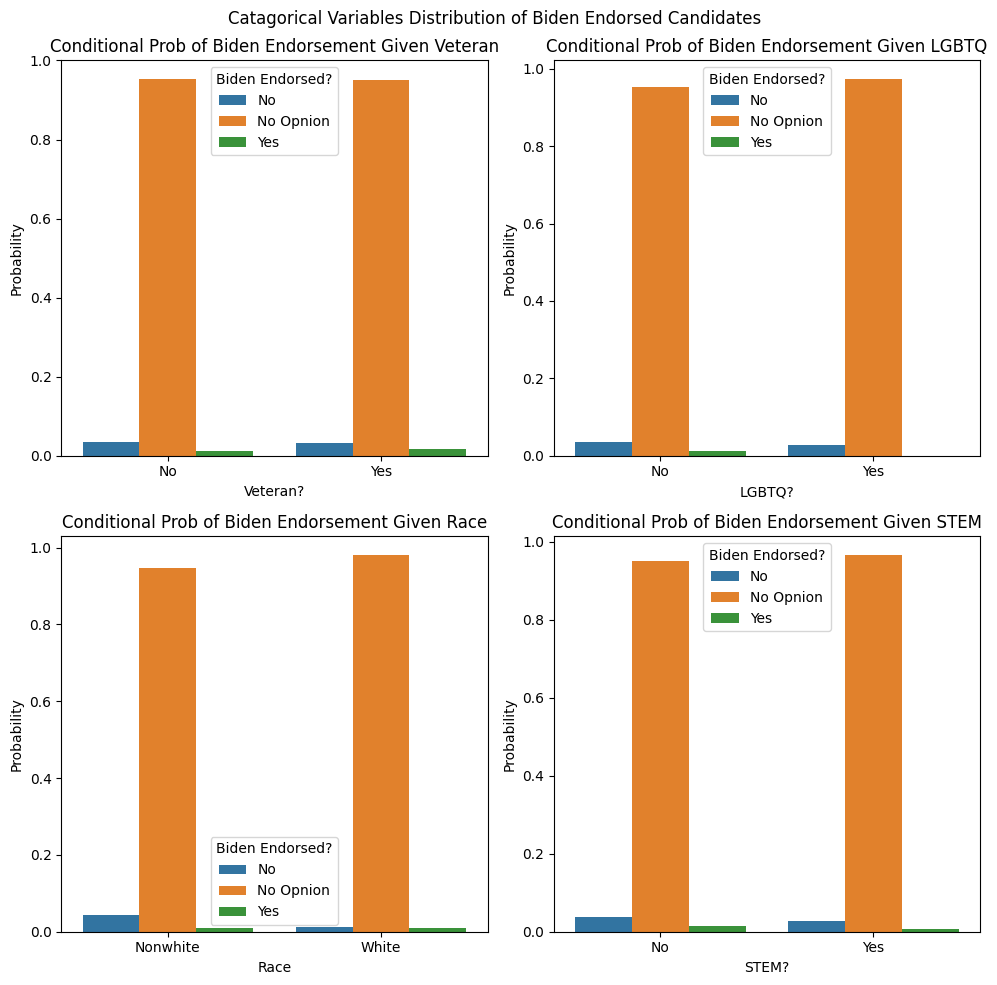

In [19]:
# Plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sns.barplot(data=melted_probs_veteran, x='Veteran?', hue='Biden Endorsed?', y='Probability', ax=axes[0, 0])
axes[0, 0].set_title('Conditional Prob of Biden Endorsement Given Veteran')

sns.barplot(data=melted_probs_lgbtq, x='LGBTQ?', hue='Biden Endorsed?', y='Probability', ax=axes[0, 1])
axes[0, 1].set_title('Conditional Prob of Biden Endorsement Given LGBTQ')

sns.barplot(data=melted_probs_race, x='Race', hue='Biden Endorsed?', y='Probability', ax=axes[1, 0])
axes[1, 0].set_title('Conditional Prob of Biden Endorsement Given Race')

sns.barplot(data=melted_probs_stem, x='STEM?', hue='Biden Endorsed?', y='Probability', ax=axes[1, 1])
axes[1, 1].set_title('Conditional Prob of Biden Endorsement Given STEM')


plt.suptitle('Catagorical Variables Distribution of Biden Endorsed Candidates')
plt.tight_layout()
plt.show()

#### Categorical EDA 2: Distribution of Biden endorsed candidates

In [20]:
no_anti_enodorsed = dem_candidates[dem_candidates['Biden Endorsed?'] != 'No']
no_anti_enodorsed = no_anti_enodorsed.fillna('No')

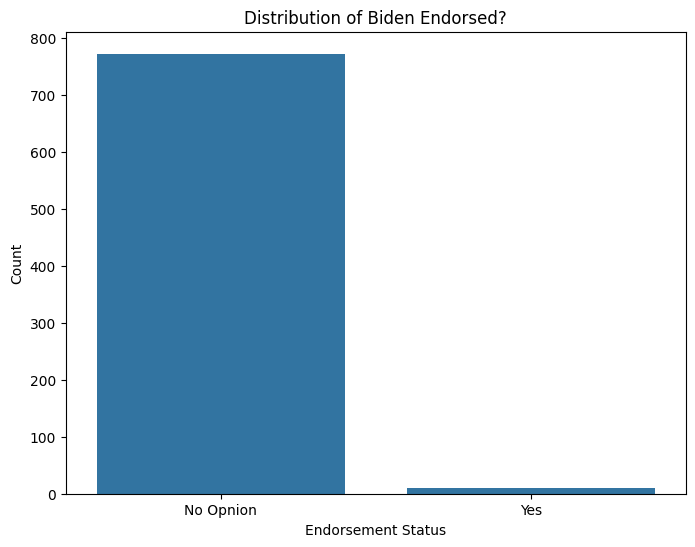

In [21]:
# Count the number of occurrences for each category in the 'Biden Endorsed?' column
class_distribution = no_anti_enodorsed['Biden Endorsed?'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Distribution of Biden Endorsed?')
plt.xlabel('Endorsement Status')
plt.ylabel('Count')
plt.show()

### Quantitative EDA 1: Sanity Check of Partisan Lean and Primary Vote Percentage

In [23]:
# Merge 2 datasets together
candidate_summary_path = 'candidate_summary_2018.csv'
dem_candidates_path = 'dem_candidates.csv'

candidate_summary_df = pd.read_csv(candidate_summary_path)
dem_candidates_df = pd.read_csv(dem_candidates_path)

candidate_summary_df['Normalized_Name'] = candidate_summary_df['Cand_Name'].str.upper()

def normalize_name(name):
    parts = name.split()
    if len(parts) > 1:
        last = parts[-1].upper()
        first_middle = parts[:-1]
        first = ' '.join(first_middle).upper()
        return f'{last}, {first}'
    else:
        return name.upper()

dem_candidates_df['Normalized_Name'] = dem_candidates_df['Candidate'].apply(normalize_name)

matched_df = pd.merge(dem_candidates_df, candidate_summary_df,
                      on='Normalized_Name',
                      how='inner',
                      suffixes=('_dem', '_summary'))

print(f"The number of matched candidates in the dataset is {len(matched_df)}.")

The number of matched candidates in the dataset is 368.


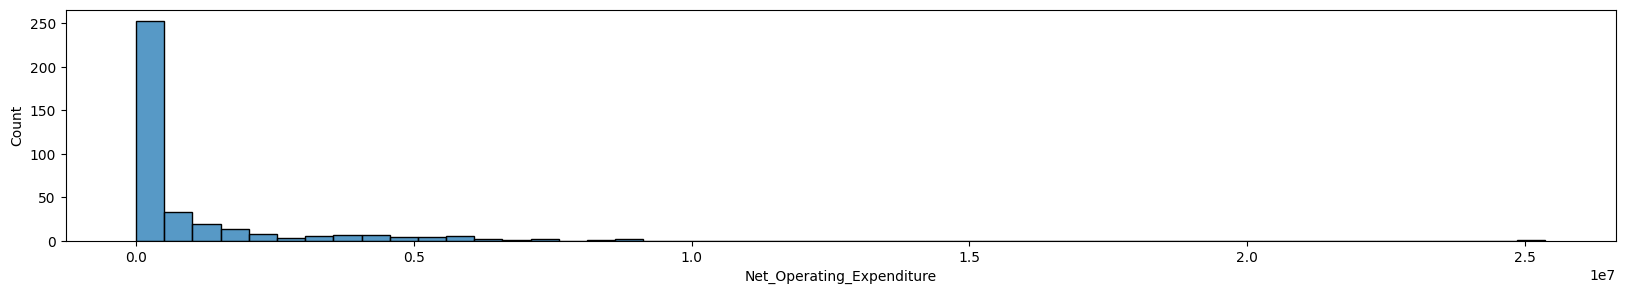

In [24]:
plt.figure(figsize=(20, 3))  # Width, height in inches

sns.histplot(data=matched_df, x="Net_Operating_Expenditure", bins = 50)

plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


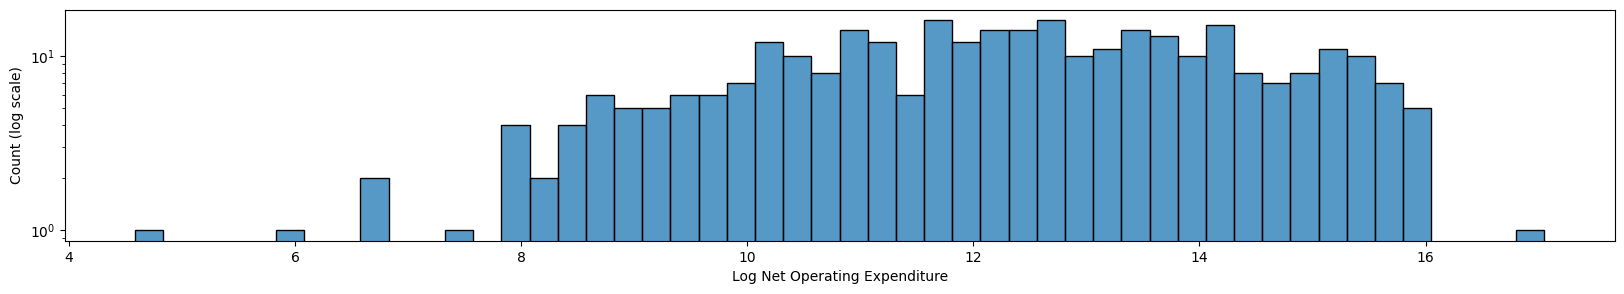

In [25]:
plt.figure(figsize=(20, 3))  # Width, height in inches

sns.histplot(data=matched_df, x=np.log(matched_df['Net_Operating_Expenditure']), bins = 50)

plt.xlabel('Log Net Operating Expenditure')
plt.ylabel('Count (log scale)')
plt.yscale('log')

plt.show()

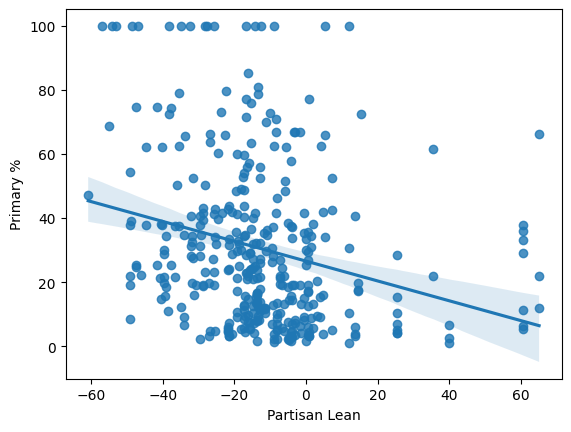

In [27]:
sns.regplot(data=matched_df, x="Partisan Lean", y="Primary %");

### Quantitative EDA 2: Net operating expenditure and and Primary Vote Percentage

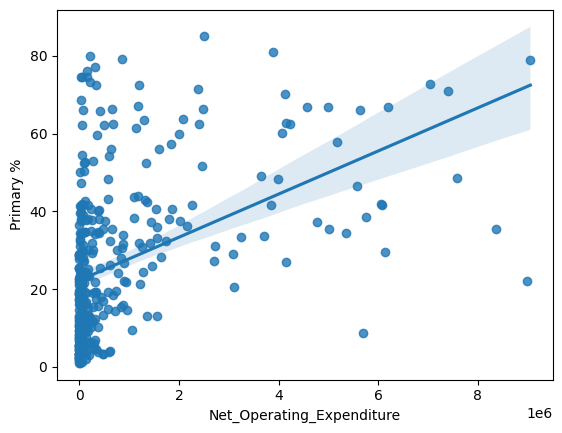

In [28]:
sns.regplot(data=matched_df[(matched_df["Net_Operating_Expenditure"] < 25000000) &
                            (matched_df["Primary %"] < 100)] ,
            x="Net_Operating_Expenditure", y="Primary %");

### Identify confounding variable and instrumental variable

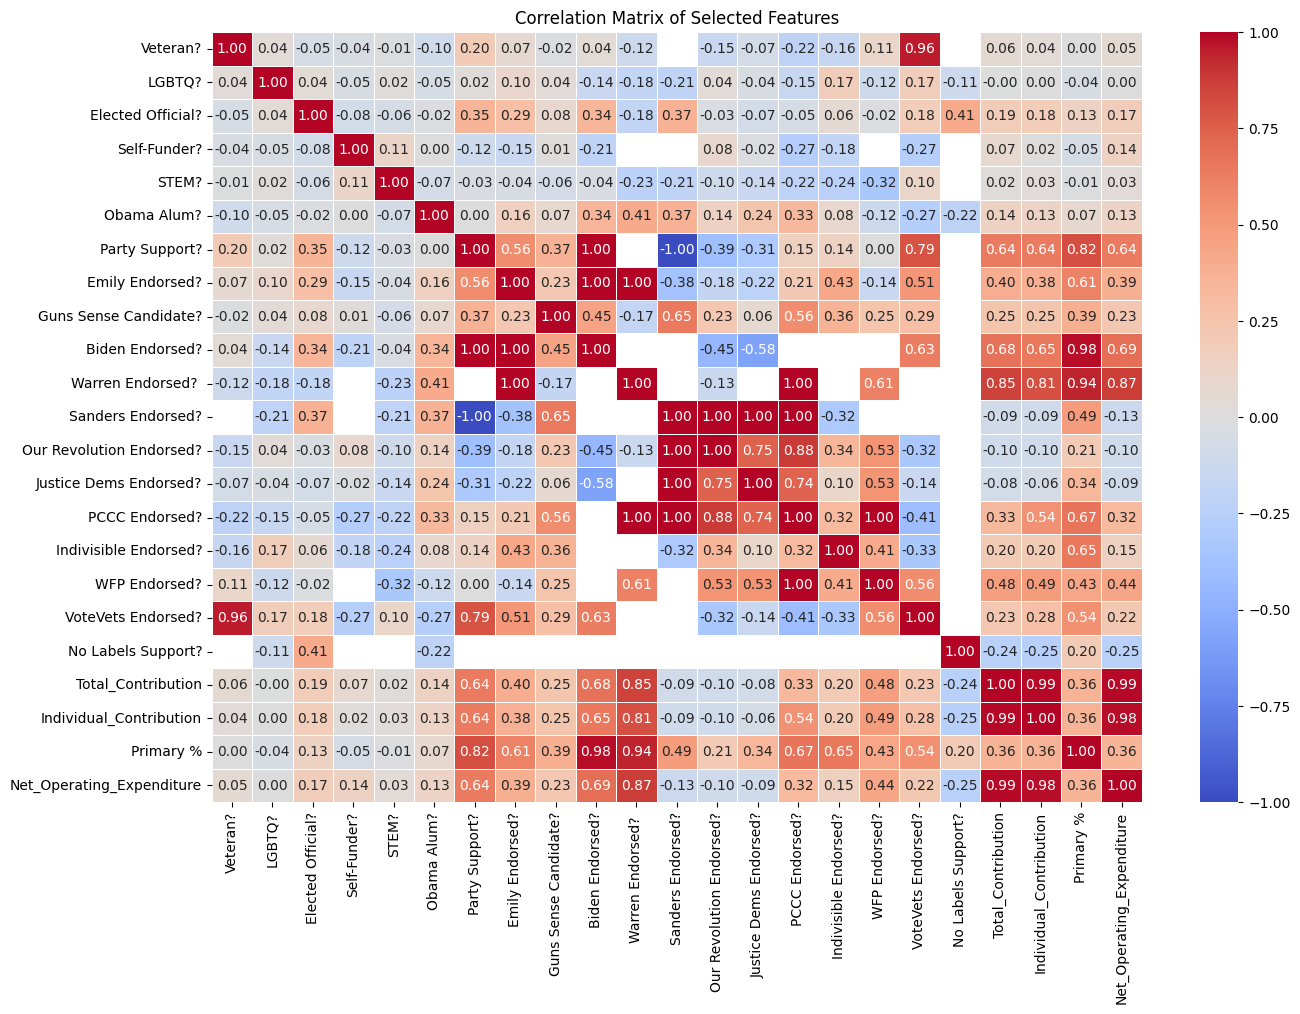

In [29]:
df = matched_df.copy()

# Encoding binary categorical columns with Yes/No/NAN values to 1/-1/0
binary_columns = ['Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'STEM?',
                  'Obama Alum?', 'Party Support?', 'Emily Endorsed?', 'Guns Sense Candidate?',
                  'Biden Endorsed?', 'Warren Endorsed? ', 'Sanders Endorsed?', 'Our Revolution Endorsed?',
                  'Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?', 'WFP Endorsed?',
                  'VoteVets Endorsed?', 'No Labels Support?']



for col in binary_columns:
    df[col] = df[col].map({"Yes": 1, "No": -1, 0:0})

numerical_data = df.select_dtypes(include=['float64', 'int64'])

binary_columns.extend(['Total_Contribution', 'Individual_Contribution', 'Primary %', 'Net_Operating_Expenditure'])
columns_to_select = binary_columns

numerical_data = numerical_data[columns_to_select]

correlation_matrix = numerical_data.corr()


plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()

# Question 1

In [30]:
# import packages
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [31]:
# import dataset
df = pd.read_csv('dem_candidates.csv')

In [32]:
# Data cleaning
df['Biden Endorsed?'] = df['Biden Endorsed?'].fillna('No') # Code NaN as no since Logistic Regression can only perform binary split
# Encoding binary categorical columns with Yes/No values to 1/0
binary_columns = ['Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'STEM?',
                  'Obama Alum?', 'Party Support?', 'Emily Endorsed?', 'Guns Sense Candidate?',
                  'Biden Endorsed?', 'Warren Endorsed? ', 'Sanders Endorsed?', 'Our Revolution Endorsed?',
                  'Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?', 'WFP Endorsed?',
                  'VoteVets Endorsed?', 'No Labels Support?']



for col in binary_columns:
    df[col] = df[col].map({"Yes": 1, "No": 0})

numerical_data = df.select_dtypes(include=['float64'
, 'int64'])

In [33]:
# Drop NA values in predictor columns
df = df[["Biden Endorsed?", "Partisan Lean", "Veteran?", "Race", "LGBTQ?", "STEM?"]].dropna()

In [34]:
# Encoding race column. White = 0, Nonwhite = 1
df['Race'] = df['Race'].map({"Nonwhite": 1, "White": 0})

In [35]:
df

,Biden Endorsed?,Partisan Lean,Veteran?,Race,LGBTQ?,STEM?
0,0,-28.879999,1.0,1,0.0,0.0
1,0,-28.879999,0.0,0,1.0,0.0
2,0,-28.879999,1.0,0,0.0,0.0
3,0,-28.879999,1.0,1,0.0,0.0
4,0,-28.879999,0.0,0,0.0,0.0
...,...,...,...,...,...,...
806,0,-35.330002,0.0,0,0.0,0.0
807,0,-47.480000,0.0,0,0.0,0.0
808,0,-47.480000,0.0,0,0.0,0.0
809,0,-47.480000,1.0,1,0.0,0.0


GLM: Logistic Regression

In [36]:
X_cols = ["Partisan Lean", "Race", "LGBTQ?"] # Columns used for prediction
y_col = "Biden Endorsed?" # The column we're trying to predict

In [37]:
X_cols = ["Partisan Lean", "STEM?", "LGBTQ?"] # Columns used for prediction
y_col = "Biden Endorsed?" # The column we're trying to predict

In [38]:
train, test = train_test_split(df, test_size = 0.3, random_state = 42)

In [39]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()

model1 = LogisticRegression().fit(train[X_cols], train[y_col])
train["logistic_pred"] = model1.predict(train[X_cols])
test["logistic_pred"] = model1.predict(test[X_cols])

In [40]:
model1.coef_

array([[ 0.02236824, -0.2625373 , -0.09596769]])

In [41]:
from sklearn.feature_selection import chi2


In [42]:
train_rmse = np.mean((train["logistic_pred"] - train["Biden Endorsed?"]) ** 2) ** 0.5
test_rmse = np.mean((test["logistic_pred"] - test["Biden Endorsed?"]) ** 2) ** 0.5

print("Training set error for linear model:", train_rmse)
print("Test set error for linear model:    ", test_rmse)

Training set error for linear model: 0.06615412016556226
Test set error for linear model:     0.14249409997581927


GLM: Logistic Regression (statsmodel)

In [43]:
import statsmodels.api as sm
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

model1_sm=sm.Logit(train['Biden Endorsed?'], sm.add_constant(train[["Partisan Lean"] + ["STEM?"] + ["LGBTQ?"]]))
model1_sm_result = model1_sm.fit()

model1_sm.fit().summary()

         Current function value: 0.026344
         Iterations: 35
         Current function value: 0.026344
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Biden Endorsed?   No. Observations:                  457
Model:                          Logit   Df Residuals:                      453
Method:                           MLE   Df Model:                            3
Date:                Tue, 07 May 2024   Pseudo R-squ.:                 0.06373
Time:                        03:50:05   Log-Likelihood:                -12.039
converged:                      False   LL-Null:                       -12.859
Covariance Type:            nonrobust   LLR p-value:                    0.6506
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -5.0370      0.710     -7.091      0.000      -6.429      -3.645
Partisan Lean     0.0206      0.024      0.846      0.397      -0.027       0.068
STEM?           -30.6343   7.05e+06  -4.34e-06      1.000   -1.38e+07    1.38e+07
LGBTQ?           -5.6938     50.487     -0.113      0.910    -104.646      93.258
=================================================================================

Possibly complete quasi-separation: A fraction 0.22 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Nonparametric: Decision Tree

In [44]:
tree_model = DecisionTreeRegressor()

tree_model = DecisionTreeRegressor().fit(train[X_cols], train[y_col])

train["tree_pred"] = tree_model.predict(train[X_cols])
test["tree_pred"] = tree_model.predict(test[X_cols])

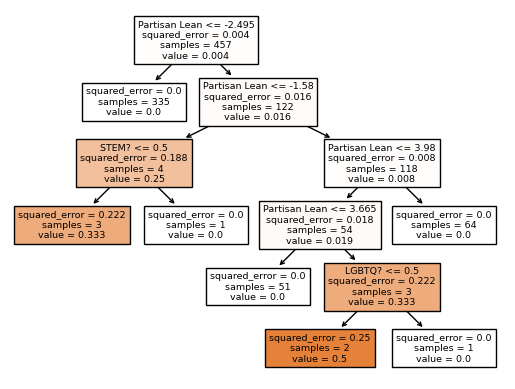

In [45]:
from sklearn import tree
tree.plot_tree(tree_model, filled=True, feature_names=X_cols, class_names=y_col);

In [46]:
train_rmse = np.mean((train["tree_pred"] - train["Biden Endorsed?"]) ** 2) ** 0.5
test_rmse = np.mean((test["tree_pred"] - test["Biden Endorsed?"]) ** 2) ** 0.5

print("Training set error for decision tree:", train_rmse)
print("Test set error for decision tree:    ", test_rmse)

Training set error for decision tree: 0.0505260438653156
Test set error for decision tree:     0.14249409997581927


Nonparametric: Random Forest

In [49]:
forest_model = RandomForestRegressor(max_features=1)

forest_model = forest_model.fit(train[X_cols], train[y_col])

train["forest_pred"] = forest_model.predict(train[X_cols])
test["forest_pred"] = forest_model.predict(test[X_cols])

In [50]:
train_rmse = np.mean((train["forest_pred"] - train["Biden Endorsed?"]) ** 2) ** 0.5
test_rmse = np.mean((test["forest_pred"] - test["Biden Endorsed?"]) ** 2) ** 0.5

print("Training set error for random forest:", train_rmse)
print("Test set error for random forest:    ", test_rmse)

Training set error for random forest: 0.051804021948145935
Test set error for random forest:     0.14255114012932854


In [51]:
from sklearn.metrics import classification_report
print(classification_report(test["Biden Endorsed?"], test["logistic_pred"]))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       193
           1       0.00      0.00      0.00         4

    accuracy                           0.98       197
   macro avg       0.49      0.50      0.49       197
weighted avg       0.96      0.98      0.97       197



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
print(classification_report(test["Biden Endorsed?"], test["tree_pred"]))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       193
           1       0.00      0.00      0.00         4

    accuracy                           0.98       197
   macro avg       0.49      0.50      0.49       197
weighted avg       0.96      0.98      0.97       197



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
forest_pred = (test["forest_pred"] >= 0.5).astype(int)
print(classification_report(test["Biden Endorsed?"], forest_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       193
           1       0.00      0.00      0.00         4

    accuracy                           0.98       197
   macro avg       0.49      0.50      0.49       197
weighted avg       0.96      0.98      0.97       197



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Question 2

In [54]:
pip install fuzzywuzzy

In [55]:
from fuzzywuzzy import process
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


The following three cells merge the two datasets. However, they may take a long time to run. For your convenience, we saved the dataframe into a csv file "matched_df.csv" which you can find in the submission. Please feel free to skip to the cell to load this saved csv file.

In [56]:
# This cell may take a long time to run.
candidate_summary_path = 'candidate_summary_2018.csv'
dem_candidates_path = 'dem_candidates.csv'

df1 = pd.read_csv(dem_candidates_path)
df2 = pd.read_csv(candidate_summary_path)

# Create a dictionary to hold potential matches
matches = {}

# For each unique candidate in df1, find the best match in df2
for candidate in df1['Candidate'].unique():
    best_match, score = process.extractOne(candidate, df2['Cand_Name'].unique())
    threshold = 90
    state1 = df1[df1['Candidate'] == candidate]['State'].iloc[0]
    state2 = df2[df2['Cand_Name'] == best_match]['Cand_Office_St'].iloc[0]
    if score > threshold and state1 == state2:  # threshold can be 80, 90, etc. based on how strict you want the matching to be
        matches[candidate] = best_match

# Map the matches in df1 to a new column for merging
df1['match_name'] = df1['Candidate'].map(matches)

# Merge based on the new match_name column
matched_df = pd.merge(df1, df2, left_on='match_name', right_on='Cand_Name', how='inner')

KeyboardInterrupt: 

In [ ]:
print(f"The number of matched candidates in the dataset is {len(matched_df)}.")

In [ ]:
matched_df.to_csv("matched_df.csv", index = False)

In [65]:
# Load the save file
matched_df = pd.read_csv("matched_df.csv")

In [66]:
matched_df_1 = matched_df[['Partisan Lean', 'Primary %', 'Net_Operating_Expenditure', 'Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'STEM?',
                  'Obama Alum?', 'Party Support?', 'Emily Endorsed?', 'Guns Sense Candidate?',
                  'Biden Endorsed?', 'Warren Endorsed? ', 'Sanders Endorsed?', 'Our Revolution Endorsed?',
                  'Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?', 'WFP Endorsed?',
                  'VoteVets Endorsed?', 'No Labels Support?']]
matched_df_1 = matched_df_1.fillna(0)

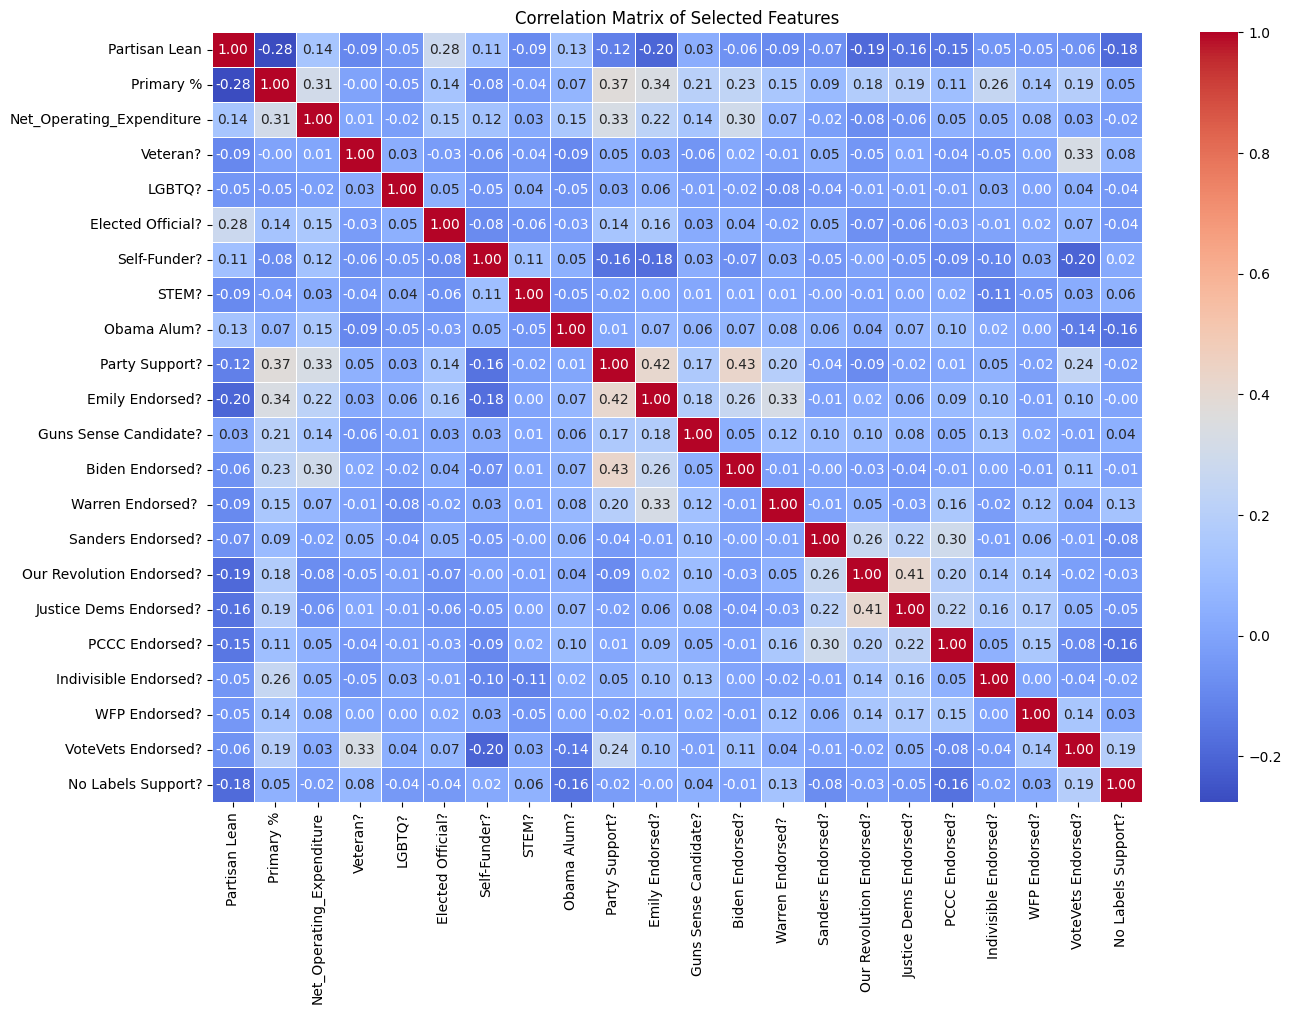

In [67]:
# Encoding binary categorical columns with Yes/No/NAN values to 1/-1/0
binary_columns = ['Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'STEM?',
                  'Obama Alum?', 'Party Support?', 'Emily Endorsed?', 'Guns Sense Candidate?',
                  'Biden Endorsed?', 'Warren Endorsed? ', 'Sanders Endorsed?', 'Our Revolution Endorsed?',
                  'Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?', 'WFP Endorsed?',
                  'VoteVets Endorsed?', 'No Labels Support?']



for col in binary_columns:
    matched_df_1[col] = matched_df_1[col].map({"Yes": 1, "No": -1, 0:0})

numerical_data = matched_df_1.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_data.corr()


plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [68]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, ParameterGrid


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
# from sklearn.linear_model import Lars

# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)

In [69]:
# Split the DataFrame into features and target
X = numerical_data.drop(columns = {"Primary %"})  # Features
y = numerical_data["Primary %"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the size of the resulting sets
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)

Training set size: (392, 21) (392,)
Testing set size: (98, 21) (98,)


In [71]:
# linear regression

# Standardize the features (important for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {np.sqrt(mse)}")

Mean Absolute Error: 15.208467351804703
Root Mean Squared Error: 21.173808683231314


Best alpha by MAE: 0.8603464416684504
Best alpha by MSE: 2.4945081352303164


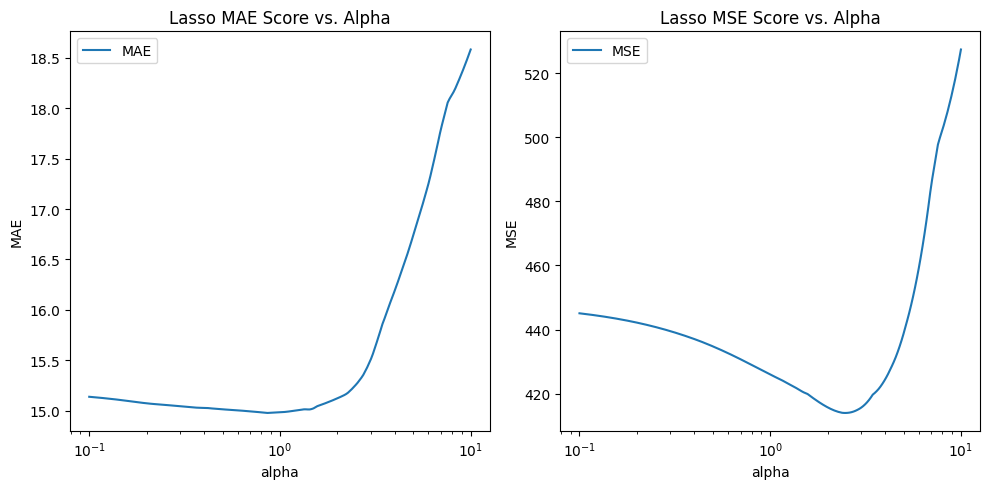

In [72]:
# Hyper parameter tuning for Lasso
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of alpha values to test
alphas = np.logspace(-1, 1, 200)  # Generates 50 values between 10^-4 and 10^1

# Initialize lists to store the scores for visualization later
mae_scores = []
mse_scores = []

# Loop through the alphas list
for alpha in alphas:
    # Create a Lasso Regression model with the current alpha
    lasso_model = Lasso(alpha=alpha)

    # Fit the model
    lasso_model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred_lasso = lasso_model.predict(X_test_scaled)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred_lasso)
    mse = mean_squared_error(y_test, y_pred_lasso)

    # Append the scores
    mae_scores.append(mae)
    mse_scores.append(mse)

    # Optionally print the alpha and corresponding MAE and MSE
    # print(f"Alpha: {alpha:.5f}, MAE: {mae:.4f}, MSE: {mse:.4f}")

# Find the alpha value with the minimum MAE or MSE
min_mae_alpha = alphas[np.argmin(mae_scores)]
min_mse_alpha = alphas[np.argmin(mse_scores)]

print(f"Best alpha by MAE: {min_mae_alpha}")
print(f"Best alpha by MSE: {min_mse_alpha}")

# Optionally, plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.semilogx(alphas, mae_scores, label='MAE')
plt.title('Lasso MAE Score vs. Alpha')
plt.xlabel('alpha')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.semilogx(alphas, mse_scores, label='MSE')
plt.title('Lasso MSE Score vs. Alpha')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()

In [73]:
# Lasso regression

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train a Lasso Regression model
lasso_model = Lasso(alpha=min_mse_alpha)
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {np.sqrt(mse)}")

Mean Absolute Error: 15.255408376058561
Root Mean Squared Error: 20.34601384133074


Best alpha by MAE: 146.49713983072863
Best alpha by MSE: 340.9285069746811


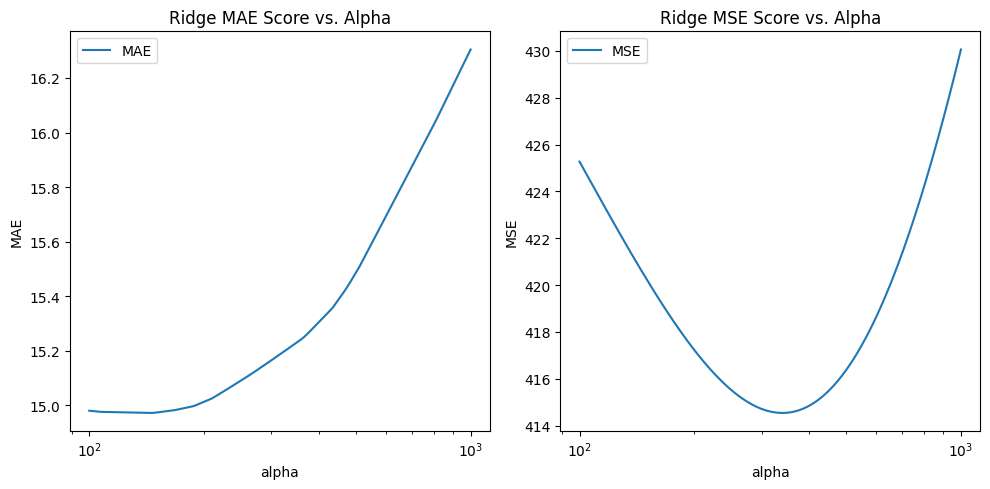

In [74]:
# Hyper parameter tunning for Ridge
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of alpha values to test
alphas = np.logspace(2, 3, 200)  # Generates 50 values between 10^-4 and 10^1

# Initialize lists to store the scores for visualization later
mae_scores = []
mse_scores = []

# Loop through the alphas list
for alpha in alphas:
    # Create a Lasso Regression model with the current alpha
    ridge_model = Ridge(alpha=alpha)

    # Fit the model
    ridge_model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred_lasso = ridge_model.predict(X_test_scaled)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred_lasso)
    mse = mean_squared_error(y_test, y_pred_lasso)

    # Append the scores
    mae_scores.append(mae)
    mse_scores.append(mse)

    # Optionally print the alpha and corresponding MAE and MSE
    # print(f"Alpha: {alpha:.5f}, MAE: {mae:.4f}, MSE: {mse:.4f}")

# Find the alpha value with the minimum MAE or MSE
min_mae_alpha = alphas[np.argmin(mae_scores)]
min_mse_alpha = alphas[np.argmin(mse_scores)]

print(f"Best alpha by MAE: {min_mae_alpha}")
print(f"Best alpha by MSE: {min_mse_alpha}")

# Optionally, plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.semilogx(alphas, mae_scores, label='MAE')
plt.title('Ridge MAE Score vs. Alpha')
plt.xlabel('alpha')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.semilogx(alphas, mse_scores, label='MSE')
plt.title('Ridge MSE Score vs. Alpha')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()

In [75]:
# Ridge regression

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train a Lasso Regression model
ridge_model = Ridge(alpha=min_mse_alpha)
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {np.sqrt(mse)}")

Mean Absolute Error: 15.219079279755283
Root Mean Squared Error: 20.360331797086197


In [76]:
# Elastic net is a combination of Lasso and Ridge, but somehow performs worse than Lasso.

In [77]:
new_df = pd.DataFrame([lasso_model.coef_], columns=X_train.columns)
df_T = new_df.transpose()

In [78]:
df_T

,0
Partisan Lean,-4.537104
Net_Operating_Expenditure,3.725361
Veteran?,-0.000000
LGBTQ?,-0.000000
Elected Official?,1.488680
Self-Funder?,-0.000000
STEM?,-0.000000
Obama Alum?,0.000000
Party Support?,4.151091
Emily Endorsed?,1.823993


In [79]:
from statsmodels.api import OLS

def fit_OLS_model(df, target_variable, explanatory_variables, intercept = False):
    """
    Fits an OLS model from data.

    Inputs:
        df: pandas DataFrame
        target_variable: string, name of the target variable
        explanatory_variables: list of strings, names of the explanatory variables
        intercept: bool, if True add intercept term
    Outputs:
        fitted_model: model containing OLS regression results
    """

    target = df[target_variable]
    inputs = df[explanatory_variables]
    if intercept:
        inputs = sm.add_constant(inputs)

    fitted_model = sm.OLS(target, inputs)
    lasso_result = fitted_model.fit_regularized(method='elastic_net', L1_wt=1.0, alpha=2.4945081352303164, start_params=None, profile_scale=False, refit=False)

    coef = lasso_result.params
    non_zero_coef = coef[coef != 0]

    inputs_refit = inputs.loc[:, non_zero_coef.index]
    model_refit = sm.OLS(target, inputs_refit).fit()


    return(model_refit)

In [80]:
from statsmodels.api import OLS

def fit_OLS_model(df1, df2, target_variable, explanatory_variables, intercept = False):
    """
    Fits an OLS model from data.

    Inputs:
        df: pandas DataFrame
        target_variable: string, name of the target variable
        explanatory_variables: list of strings, names of the explanatory variables
        intercept: bool, if True add intercept term
    Outputs:
        fitted_model: model containing OLS regression results
    """

    target = df2[target_variable]
    inputs = df1[explanatory_variables]
    if intercept:
        inputs = sm.add_constant(inputs)

    fitted_model = sm.OLS(target, inputs).fit()
#     lasso_result = fitted_model.fit_regularized(method='elastic_net', L1_wt=1.0, alpha=2.4945081352303164, start_params=None, profile_scale=False, refit=False)

#     coef = lasso_result.params
#     non_zero_coef = coef[coef != 0]

#     inputs_refit = inputs.loc[:, non_zero_coef.index]
#     model_refit = sm.OLS(target, inputs_refit).fit()


    return(fitted_model)

In [81]:
scaled_data = scaler.fit_transform(numerical_data)
scaled_df = pd.DataFrame(scaled_data, columns=numerical_data.columns)

# Fit OLS parameters to predict Y from the predicted Z_hat.
beta1_model = fit_OLS_model(scaled_df, numerical_data, 'Primary %', ['Partisan Lean', 'Net_Operating_Expenditure', 'Elected Official?',
       'Party Support?', 'Emily Endorsed?', 'Guns Sense Candidate?',
       'Our Revolution Endorsed?', 'Justice Dems Endorsed?',
       'Indivisible Endorsed?', 'WFP Endorsed?', 'VoteVets Endorsed?'], intercept = False)
print(beta1_model.summary())

                                 OLS Regression Results                                
Dep. Variable:              Primary %   R-squared (uncentered):                   0.159
Model:                            OLS   Adj. R-squared (uncentered):              0.139
Method:                 Least Squares   F-statistic:                              8.209
Date:                Tue, 07 May 2024   Prob (F-statistic):                    3.10e-13
Time:                        04:02:03   Log-Likelihood:                         -2457.4
No. Observations:                 490   AIC:                                      4937.
Df Residuals:                     479   BIC:                                      4983.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------